ProcessingLargeClusters data
ProcessingSmallClusters data
ProcessingSmallClusters1 data
ProcessingSmallClusters2 data
ProcessingSmallClusters3 data
ProcessingSmallClusters4 data
ProcessingSmallClusters5 data
ProcessingSmallClusters6 data
ProcessingRandom data
ProcessingAlternating data


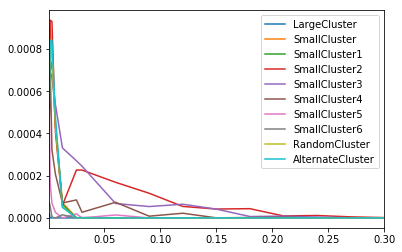

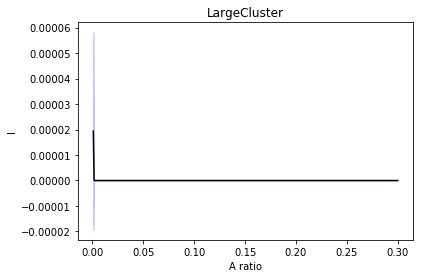

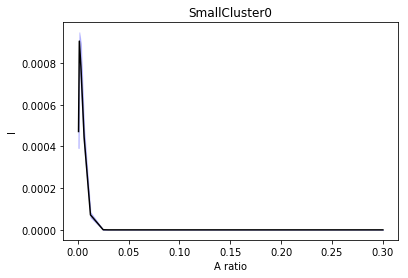

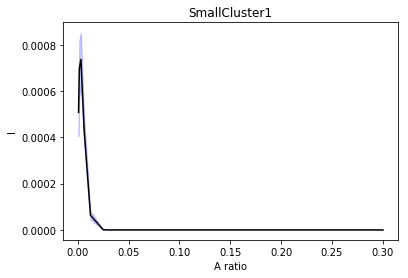

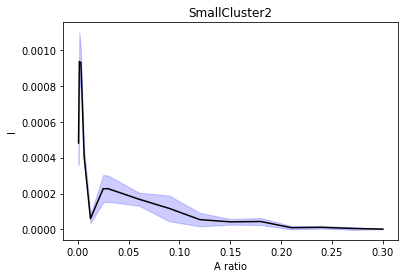

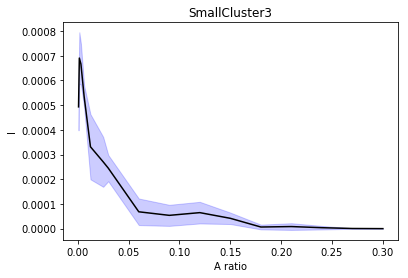

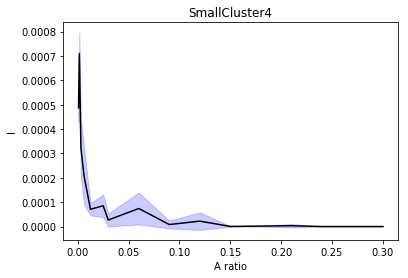

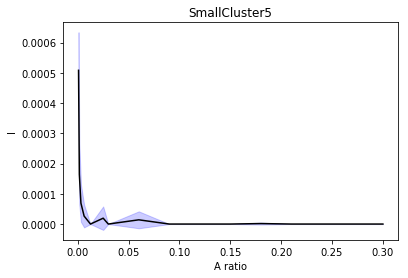

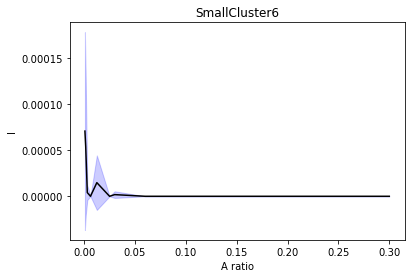

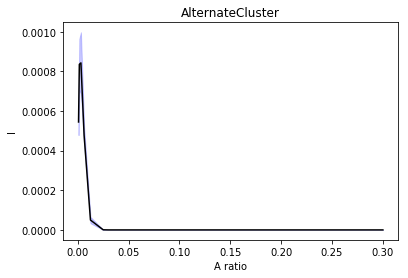

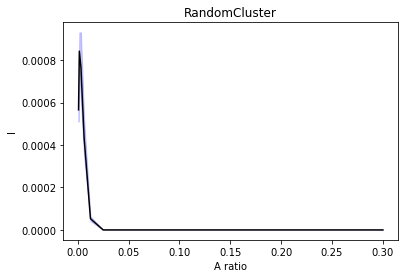

##################################################
{'AA': 0.0, 'BB': 0.0, 'AB': 2.0}
                I       std
0.00078  0.000019  0.000039
0.00156  0.000000  0.000000
0.00312  0.000000  0.000000
0.00625  0.000000  0.000000
0.01250  0.000000  0.000000
0.02500  0.000000  0.000000
0.03000  0.000000  0.000000
0.06000  0.000000  0.000000
0.09000  0.000000  0.000000
0.12000  0.000000  0.000000
0.15000  0.000000  0.000000
0.18000  0.000000  0.000000
0.21000  0.000000  0.000000
0.24000  0.000000  0.000000
0.27000  0.000000  0.000000
0.30000  0.000000  0.000000
##################################################
{'AA': 0.0, 'BB': 0.0, 'AB': 0.25}
                    I           std
0.00078  4.716000e-04  7.970094e-05
0.00156  9.048000e-04  4.258356e-05
0.00312  7.822000e-04  1.111763e-04
0.00625  4.442000e-04  4.544183e-05
0.01250  7.200000e-05  1.249000e-05
0.02500  6.000000e-07  8.000000e-07
0.03000  0.000000e+00  0.000000e+00
0.06000  0.000000e+00  0.000000e+00
0.09000  0.000000e+00  0.0000

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
def plotfunc(df,name):
    plt.figure()
    plt.title(name)
    plt.xlabel("A ratio")
    plt.ylabel("I")
    plt.plot(df.index, df["I"], 'k')
    plt.fill_between(df.index, df["I"]-df["std"], df["I"]+df["std"], color='b', alpha=0.2)
    plt.show()
    
    
interactionAB={"LargeClusters":{'AA':0.0,'BB':0.0,'AB':2.0},
                   "SmallClusters":{'AA':0.0,'BB':0.0,'AB':0.25},
                   "SmallClusters1":{'AA':0.0,'BB':0.0,'AB':0.5},
                   "SmallClusters2":{'AA':0.0,'BB':0.0,'AB':0.75},
                   "SmallClusters3":{'AA':0.0,'BB':0.0,'AB':1.0},
                   "SmallClusters4":{'AA':0.0,'BB':0.0,'AB':1.25},
                   "SmallClusters5":{'AA':0.0,'BB':0.0,'AB':1.5},
                   "SmallClusters6":{'AA':0.0,'BB':0.0,'AB':1.75},
                   "Random":{'AA':0.0,'BB':0.0,'AB':0.0},
                   "Alternating":{'AA':0.0,'BB':0.0,'AB':-2.0}}
cluster_shapes=["LargeClusters","SmallClusters","SmallClusters1","SmallClusters2","SmallClusters3","SmallClusters4","SmallClusters5","SmallClusters6","Random","Alternating"]

ratio_of_A=[0.00078,0.00156,0.00312,0.00625,0.0125,0.025,0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3]
#ratio_of_A=[0.00078,0.00156,0.00312,0.00625,0.0125,0.025,]
#ratio_of_A=[0.03,0.06,0.09,0.12,0.15,0.18,0.21,0.24,0.27,0.3]
# #ratio_of_A=[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1]
atomratio_list=[[rationA,1.0-rationA] for rationA in ratio_of_A]
repeat=5

df_L=pd.DataFrame(index=ratio_of_A)
df_S0=pd.DataFrame(index=ratio_of_A)
df_S1=pd.DataFrame(index=ratio_of_A)
df_S2=pd.DataFrame(index=ratio_of_A)
df_S3=pd.DataFrame(index=ratio_of_A)
df_S4=pd.DataFrame(index=ratio_of_A)
df_S5=pd.DataFrame(index=ratio_of_A)
df_S6=pd.DataFrame(index=ratio_of_A)
df_R=pd.DataFrame(index=ratio_of_A)
df_A=pd.DataFrame(index=ratio_of_A)

scan_infile_folder="./AA_qunching_Scan_input/simulation_data/"

for cluster_shape in cluster_shapes:
    print("Processing"+cluster_shape+" data")
    mainfolder=cluster_shape
    for atomratio in atomratio_list:
        I_list=[]
        for repeat_counter in range(repeat):
            filefolder='_'.join([str(atomratio[0]),str(atomratio[1])+"AB",str(interactionAB[cluster_shape]["AB"])+"r",str(repeat_counter)])
            file=os.path.join(scan_infile_folder,mainfolder,filefolder,"I.txt")
            try:
                with open(file,'r') as f:
                    I=float(f.readline())
                    I_list.append(I)
            except:
                print(file)
        #print(I_list)
        assert(len(I_list)==repeat)
        I_average=np.average(I_list)
        I_std=np.std(I_list)
        if cluster_shape=="LargeClusters":
            df_L.loc[atomratio[0],"I"]=I_average
            df_L.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters":
            df_S0.loc[atomratio[0],"I"]=I_average
            df_S0.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters1":
            df_S1.loc[atomratio[0],"I"]=I_average
            df_S1.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters2":
            df_S2.loc[atomratio[0],"I"]=I_average
            df_S2.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters3":
            df_S3.loc[atomratio[0],"I"]=I_average
            df_S3.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters4":
            df_S4.loc[atomratio[0],"I"]=I_average
            df_S4.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters5":
            df_S5.loc[atomratio[0],"I"]=I_average
            df_S5.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="SmallClusters6":
            df_S6.loc[atomratio[0],"I"]=I_average
            df_S6.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="Random":
            df_R.loc[atomratio[0],"I"]=I_average
            df_R.loc[atomratio[0],"std"]=I_std
        elif cluster_shape=="Alternating":
            df_A.loc[atomratio[0],"I"]=I_average
            df_A.loc[atomratio[0],"std"]=I_std
        else:
            raise Exception("Error")        




df_I_all=pd.DataFrame(index=ratio_of_A)
df_I_all["LargeCluster"]=df_L["I"]
df_I_all["SmallCluster"]=df_S0["I"]
df_I_all["SmallCluster1"]=df_S1["I"]
df_I_all["SmallCluster2"]=df_S2["I"]
df_I_all["SmallCluster3"]=df_S3["I"]
df_I_all["SmallCluster4"]=df_S4["I"]
df_I_all["SmallCluster5"]=df_S5["I"]
df_I_all["SmallCluster6"]=df_S6["I"]
df_I_all["RandomCluster"]=df_R["I"]
df_I_all["AlternateCluster"]=df_A["I"]

fig = plt.figure(figsize=(15,15))
df_I_all.plot()
plt.show()


plotfunc(df_L,"LargeCluster")      
plotfunc(df_S0,"SmallCluster0")     
plotfunc(df_S1,"SmallCluster1")     
plotfunc(df_S2,"SmallCluster2")     
plotfunc(df_S3,"SmallCluster3")     
plotfunc(df_S4,"SmallCluster4")     
plotfunc(df_S5,"SmallCluster5")     
plotfunc(df_S6,"SmallCluster6")     
plotfunc(df_A,"AlternateCluster")     
plotfunc(df_R,"RandomCluster")    
            
    
print("#"*50)
print(interactionAB["LargeClusters"])
print(df_L)
print("#"*50)
print(interactionAB["SmallClusters"])
print(df_S0)
print("#"*50)
print(interactionAB["SmallClusters1"])
print(df_S1)
print("#"*50)
print(interactionAB["SmallClusters2"])
print(df_S2)
print("#"*50)
print(interactionAB["SmallClusters3"])
print(df_S3)
print("#"*50)
print(interactionAB["SmallClusters4"])
print(df_S4)
print("#"*50)
print(interactionAB["SmallClusters5"])
print(df_S5)
print("#"*50)
print(interactionAB["SmallClusters6"])
print(df_S6)
print("#"*50)
print(interactionAB["Alternating"])
print(df_A)
print("#"*50)
print(interactionAB["Random"])
print(df_R)
            
            
# unfinished_id=[]
# file_counter=0
# scan_infile_folder="./Scan_input/simulation_data/"
# for atomratio in atomratio_list:
#     for cluster_shape in cluster_shapes:
#         mainfolder=cluster_shape
#         for repeat_counter in range(repeat):
#             filefolder='_'.join([str(atomratio[0]),str(atomratio[1])+"AB",str(interactionAB[cluster_shape]["AB"])+"r",str(repeat_counter)])
#             #result_key='_'.join([cluster_shape,str(atomratio[0]),str(atomratio[1]),str(repeat_counter)])
#             file_counter+=1
#             filename="I.txt"
#             filename=os.path.join(scan_infile_folder,mainfolder,filefolder,filename) 
#             try:
#                 with open(filename,'r') as f:
#                     I=float(f.readline())
#                     #print("%s %f\n" % (filename,I))
#             except:
#                 unfinished_id.append(file_counter)
# print("="*50)
# print(unfinished_id)

 


In [2]:
 print(len(unfinished_id))

0
